**<font size=48>Machine Learning Project Group 7</font>**<br>

PROJECT GROUP 7 - Flood Prediction Model

Dataset taken from:
- https://datasets.omdena.com/dataset/climate-risk-prediction-(malaysia)
- https://www.emdat.be/

Group Members:
- Syafiq Bin Shamsul Azman (1191102112)
- Nur Irdina Binti Hassan (1191202351)
- Christopher Kong Wei Jie (1191101763)


In [58]:
# This is needed if you need to read data from your Google Drive
from google.colab import drive
drive.mount('/content/drive')

import os

# Change the path to where you run the Jupyter Notebook from.
notebook_path_syafiq = r"/content/drive/MyDrive/Machine Learning Group Folder/Lab Exercise"
notebook_path_chris = r"/content/drive/MyDrive"

import os
os.chdir(notebook_path_chris)
!pwd

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive


# **Using PCA to Explore, Visualize, Analyse our data**

## **Data Exploration - PCA**

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# **PCA Exploration With CleanDataset**

In [60]:
# Read the CSV file into a pandas DataFrame
df = pd.read_csv('/content/drive/MyDrive/Machine Learning Group Folder/Project (40%)/Flood_Dataset_Final_Final.csv')

flood_data = df[['PRCP', 'TAVG']].values
flood_feature_names = np.array(['PRCP', 'TAVG'])
flood_labels = df['status'].values

print(type(flood_data))
print(type(flood_labels))
print(type(flood_feature_names))

print(flood_data.shape)
print(flood_labels.shape)
print(flood_feature_names.shape)

print(flood_data)
print(flood_labels)
print(flood_feature_names)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(102669, 2)
(102669,)
(2,)
[[36.1 25.8]
 [16.  23.7]
 [ 5.1 25.4]
 ...
 [ 8.9 26.3]
 [35.1 27.9]
 [ 0.  27. ]]
['no flood' 'no flood' 'no flood' ... 'no flood' 'flood' 'no flood']
['PRCP' 'TAVG']


In [61]:
flood_labels = flood_labels.reshape( (102669, 1) )
flood_df = pd.DataFrame(np.concatenate( [flood_data, flood_labels], axis = 1 ) )
flood_df.columns = np.append(flood_feature_names, 'label')

In [62]:
flood_df.head()

,PRCP,TAVG,label
0,36.1,25.8,no flood
1,16.0,23.7,no flood
2,5.1,25.4,no flood
3,0.0,26.7,no flood
4,11.9,26.2,no flood


In [63]:
flood_df.tail()

,PRCP,TAVG,label
102664,23.9,27.9,no flood
102665,0.0,26.7,no flood
102666,8.9,26.3,no flood
102667,35.1,27.9,flood
102668,0.0,27.0,no flood


# **Data Visualization using PCA**

In [64]:
from sklearn.preprocessing import StandardScaler

X = flood_df.loc[:, flood_feature_names].values
X = StandardScaler().fit_transform(X) # normalizing the features

print(X.shape)

print("np.mean(X) =", np.mean(X))
print("np.std(X) =", np.std(X))

feature_columns = ['feature' + str(i) for i in range(X.shape[1])]

X_normalized = pd.DataFrame(X, columns = feature_columns)

(102669, 2)
np.mean(X) = -1.644361530906114e-15
np.std(X) = 1.0


In [65]:
X_normalized.tail()

,feature0,feature1
102664,0.927576,0.596682
102665,-0.404126,-0.413767
102666,0.091780,-0.750583
102667,1.551636,0.596682
102668,-0.404126,-0.161155


In [66]:
from sklearn.decomposition import PCA

flood_pca = PCA(n_components = 2)
flood_principal_components = flood_pca.fit_transform(X)

flood_pca_df = pd.DataFrame(data = flood_principal_components,
                             columns = ["principal component 1", "principal component 2"])

print('Explained variation per principal component: {}'.format(flood_pca.explained_variance_ratio_))

flood_pca_df.tail()

Explained variation per principal component: [0.62321403 0.37678597]


,principal component 1,principal component 2
102664,0.233977,1.077813
102665,0.006817,-0.578338
102666,0.595640,-0.465844
102667,0.675255,1.519090
102668,-0.171807,-0.399714


<Figure size 640x480 with 0 Axes>

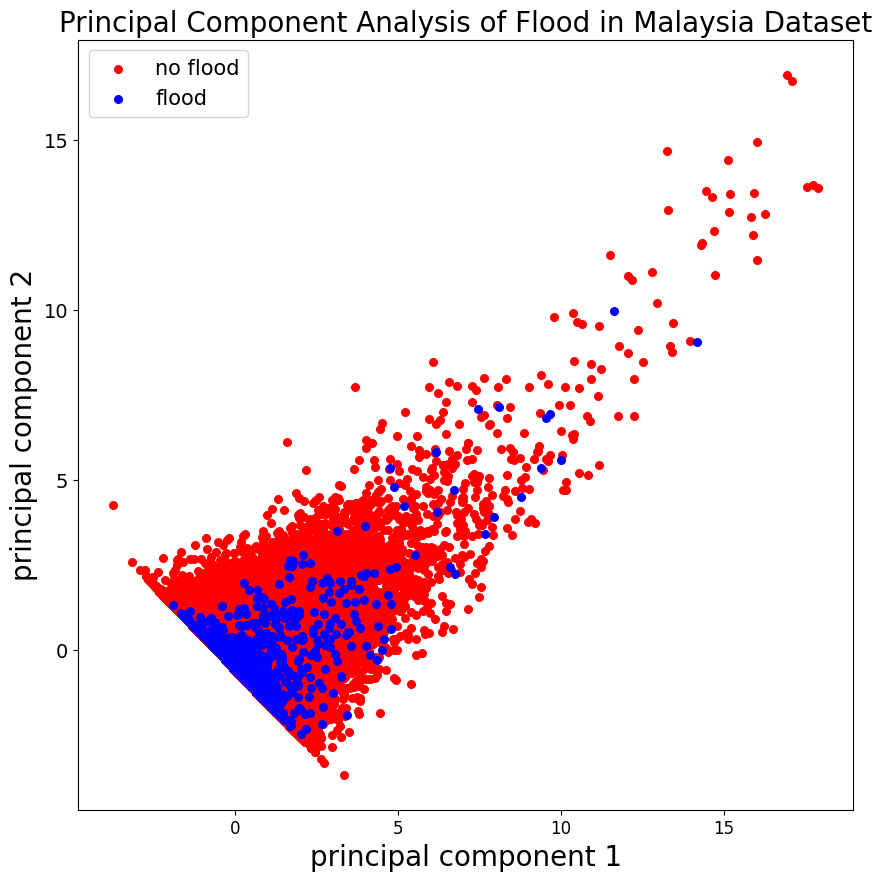

In [67]:
plt.figure()
plt.figure(figsize = (10,10))

plt.xticks(fontsize = 12)
plt.yticks(fontsize = 14)
plt.xlabel("principal component 1",fontsize = 20)
plt.ylabel("principal component 2",fontsize = 20)
plt.title("Principal Component Analysis of Flood in Malaysia Dataset",fontsize = 20)

targets = ['no flood', 'flood']
colors = ['r', 'b']

for target, color in zip(targets, colors):
    indices_to_keep = flood_df["label"] == target
    plt.scatter(flood_pca_df.loc[indices_to_keep, 'principal component 1'],
                flood_pca_df.loc[indices_to_keep, 'principal component 2'],
                c = color, s = 30)

plt.legend(targets,prop = {'size': 15});

# **Visualising Data without PCA**

Visualisation for average temperature for all the years

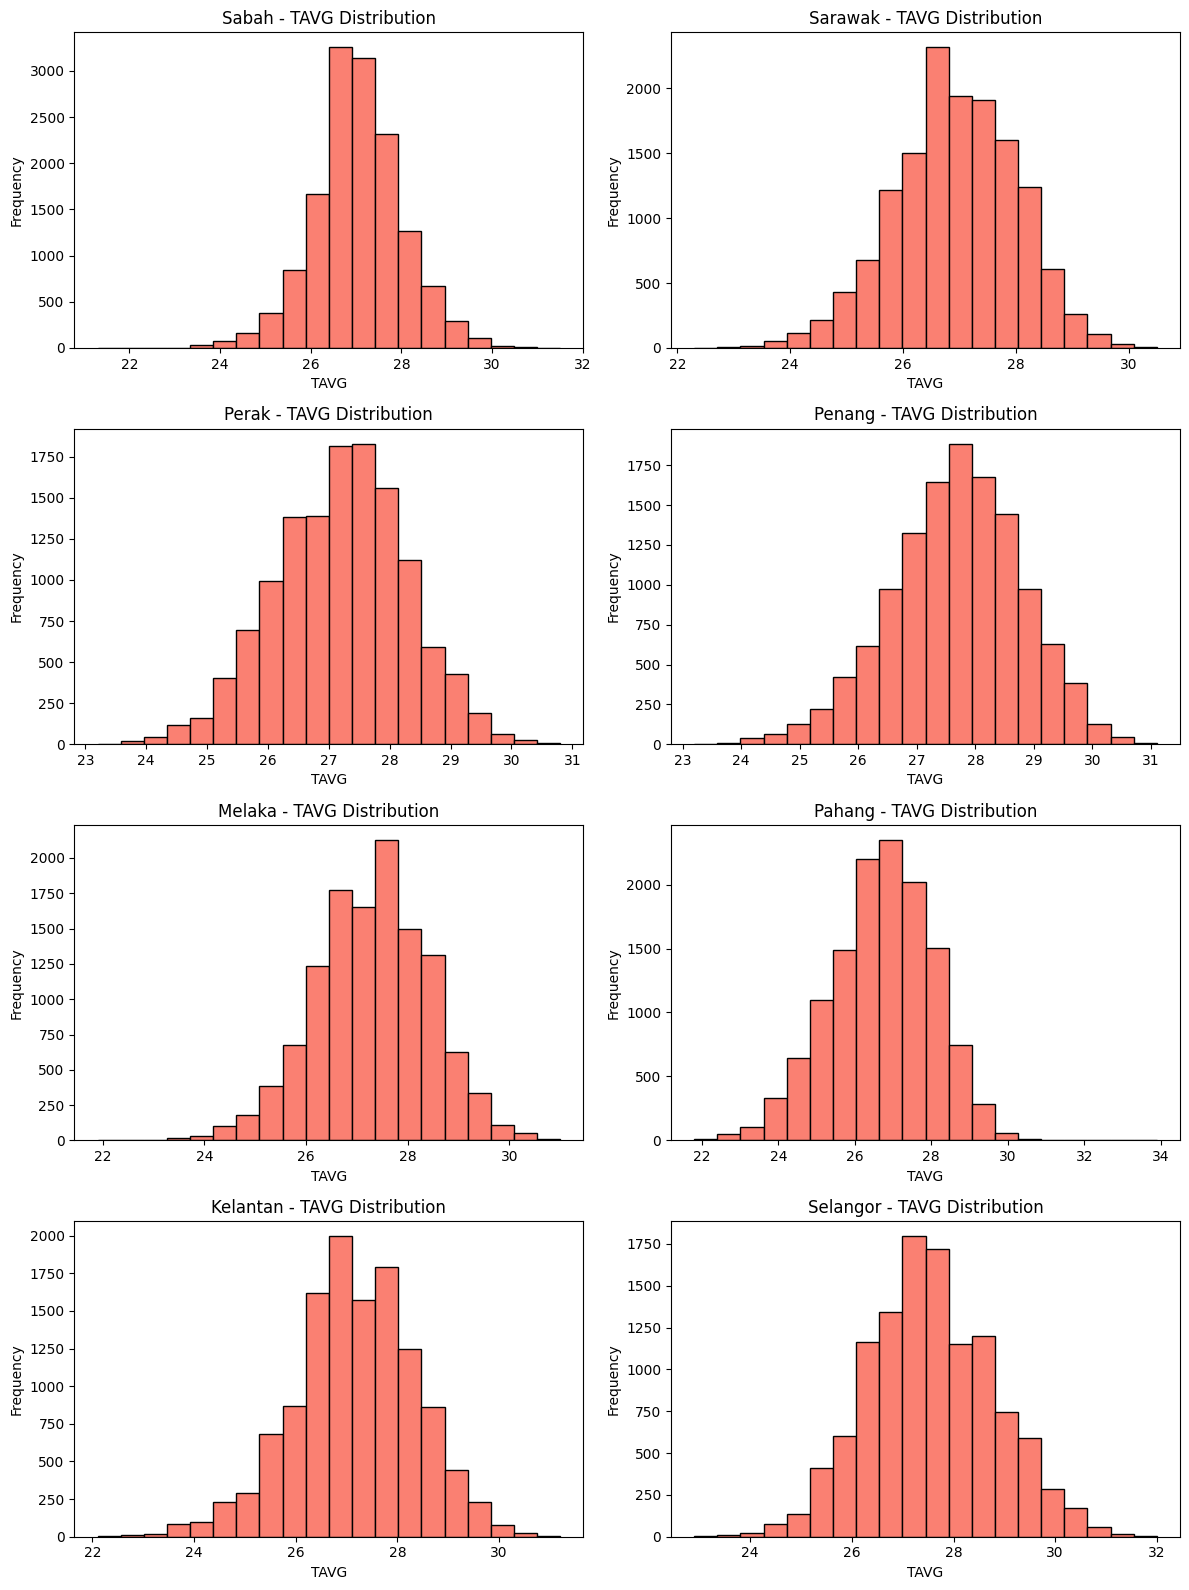

In [68]:
selected_states = ['Sabah', 'Sarawak', 'Perak', 'Penang', 'Melaka', 'Pahang', 'Kelantan', 'Selangor']
filtered_data = df[df['state'].isin(selected_states)]

fig, axs = plt.subplots(4, 2, figsize=(12, 16))

for i, state in enumerate(selected_states):
    row, col = divmod(i, 2)  # Calculate row and column indices
    state_data = filtered_data[filtered_data['state'] == state]

    # TAVG histogram
    axs[row, col].hist(state_data['TAVG'], bins=20, color='salmon', edgecolor='black')
    axs[row, col].set_title(f'{state} - TAVG Distribution')
    axs[row, col].set_xlabel('TAVG')
    axs[row, col].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

Visualisation for the precipitation for all the years combined based on each states

<ipython-input-69-96784cd20325>:8: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  filtered_data['DATE'] = pd.to_datetime(filtered_data['DATE'])


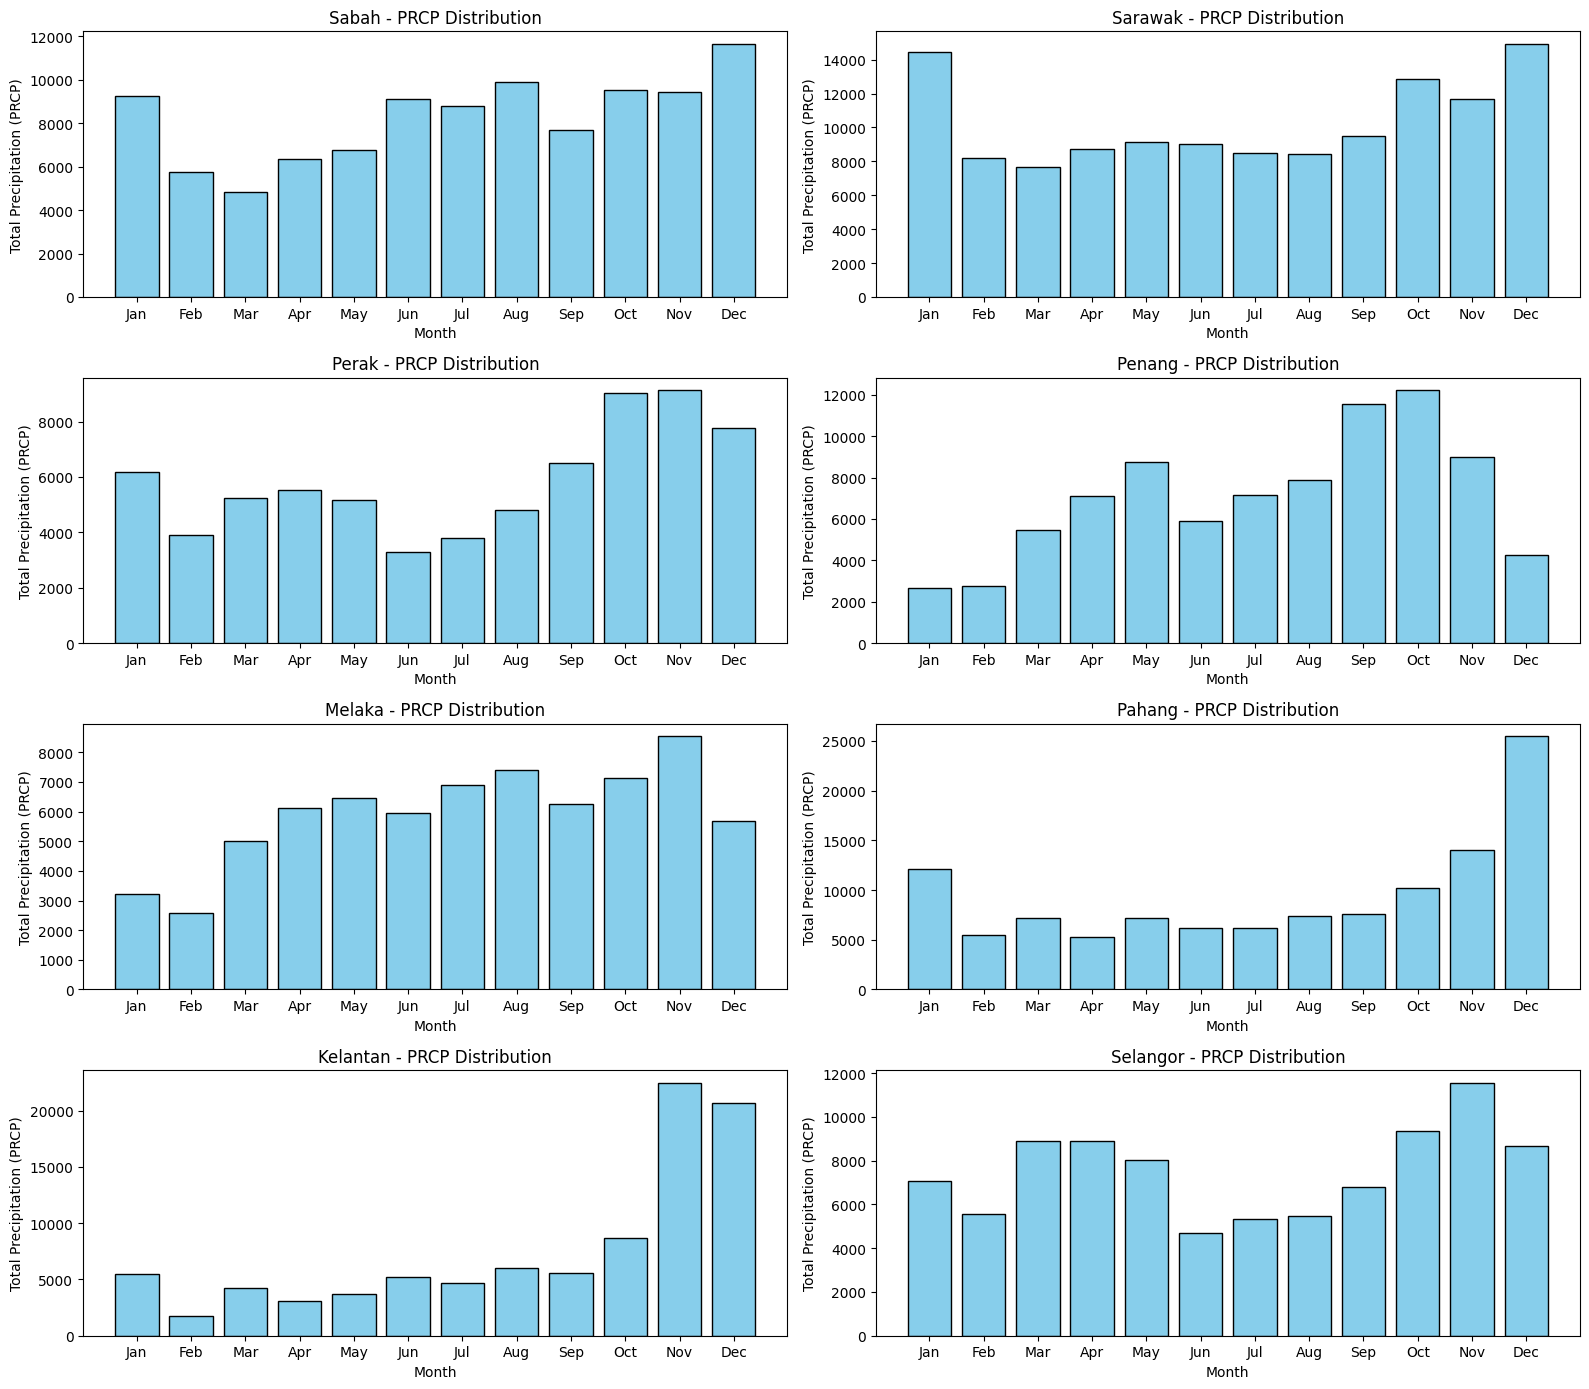

In [69]:
import matplotlib.pyplot as plt
import pandas as pd

selected_states = ['Sabah', 'Sarawak', 'Perak', 'Penang', 'Melaka', 'Pahang', 'Kelantan', 'Selangor']
filtered_data = df[df['state'].isin(selected_states)]

# Convert the date column to datetime format
filtered_data['DATE'] = pd.to_datetime(filtered_data['DATE'])

monthly_data = filtered_data.groupby([filtered_data['DATE'].dt.month, filtered_data['state']])['PRCP'].sum().unstack()

fig, axs = plt.subplots(4, 2, figsize=(16, 14))

for i, state in enumerate(selected_states):
    row, col = divmod(i, 2)  # Calculate row and column indices

    # PRCP histogram
    axs[row, col].bar(range(1, 13), monthly_data[state], color='skyblue', edgecolor='black')
    axs[row, col].set_title(f'{state} - PRCP Distribution')
    axs[row, col].set_xlabel('Month')
    axs[row, col].set_ylabel('Total Precipitation (PRCP)')
    axs[row, col].set_xticks(range(1, 13))
    axs[row, col].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

plt.tight_layout()
plt.show()



Visualisation of the frequency of flood throughout the years based on each states

<ipython-input-70-62851bf60b1e>:7: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  filtered_data['DATE'] = pd.to_datetime(filtered_data['DATE'])


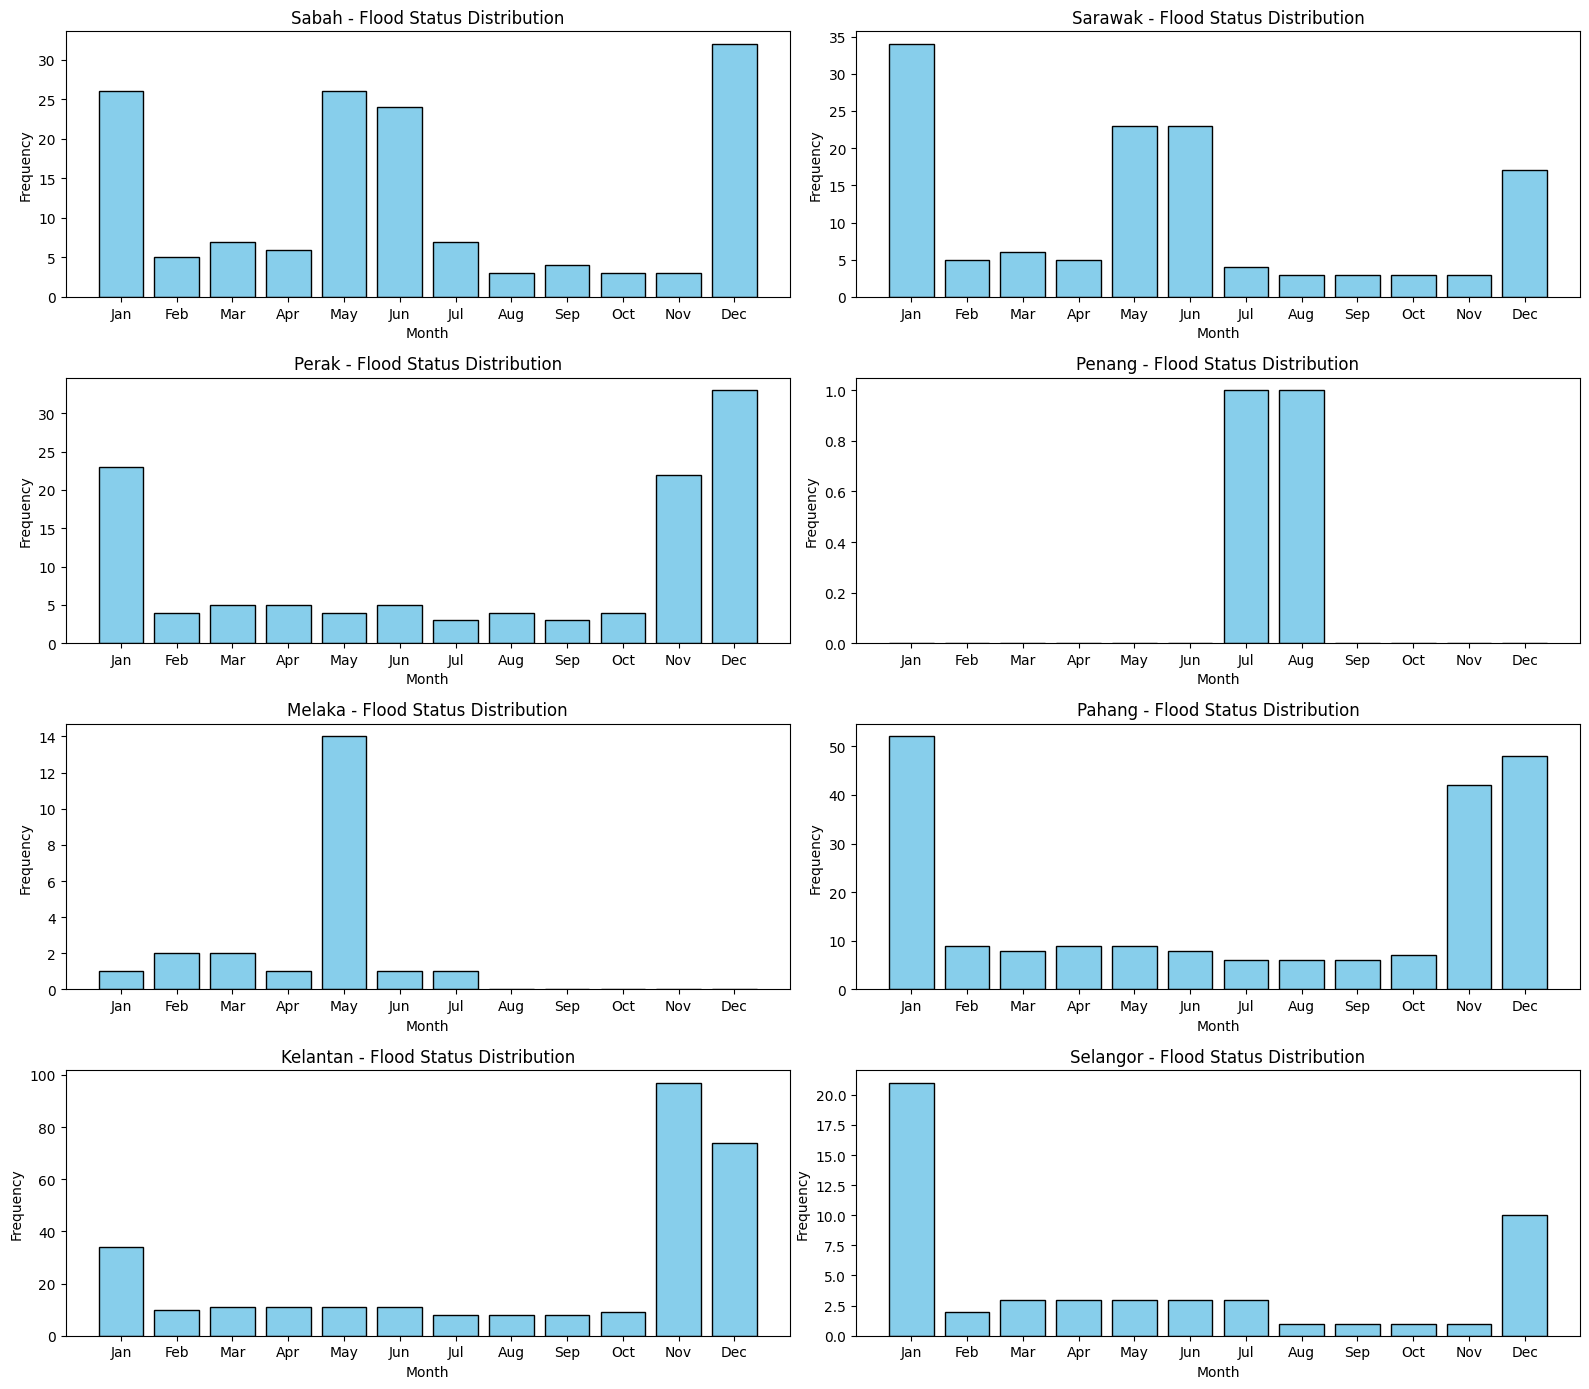

In [70]:
import matplotlib.pyplot as plt
import pandas as pd

selected_states = ['Sabah', 'Sarawak', 'Perak', 'Penang', 'Melaka', 'Pahang', 'Kelantan', 'Selangor']
filtered_data = df[df['state'].isin(selected_states)]

filtered_data['DATE'] = pd.to_datetime(filtered_data['DATE'])

# Group data by month and calculate status frequency
monthly_data_status = filtered_data.groupby([filtered_data['DATE'].dt.month, filtered_data['state']])['status'].value_counts().unstack()
monthly_data_status = monthly_data_status.reindex(index=pd.MultiIndex.from_product([range(1, 13), selected_states], names=['Month', 'State']))

fig, axs = plt.subplots(4, 2, figsize=(16, 14))

for i, state in enumerate(selected_states):
    row, col = divmod(i, 2)  # Calculate row and column indices

    # Status histogram
    axs[row, col].bar(range(1, 13), monthly_data_status.loc[(slice(None), state), 'flood'].fillna(0), color='skyblue', edgecolor='black')
    axs[row, col].set_title(f'{state} - Flood Status Distribution')
    axs[row, col].set_xlabel('Month')
    axs[row, col].set_ylabel('Frequency')
    axs[row, col].set_xticks(range(1, 13))
    axs[row, col].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

plt.tight_layout()
plt.show()


In [71]:
df['DATE'] = pd.to_datetime(df['DATE'])
df['month'] = df['DATE'].dt.month


<ipython-input-71-0d84ce952dc7>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['DATE'] = pd.to_datetime(df['DATE'])


In [72]:
monthly_data_status = filtered_data.groupby([filtered_data['DATE'].dt.month, filtered_data['state']])['status'].value_counts()
monthly_data_status

DATE  state     status  
1     Kelantan  no flood     996
                flood         34
      Melaka    no flood     960
                flood          1
      Pahang    no flood    1055
                            ... 
12    Sabah     flood         32
      Sarawak   no flood    1209
                flood         17
      Selangor  no flood    1021
                flood         10
Name: status, Length: 177, dtype: int64

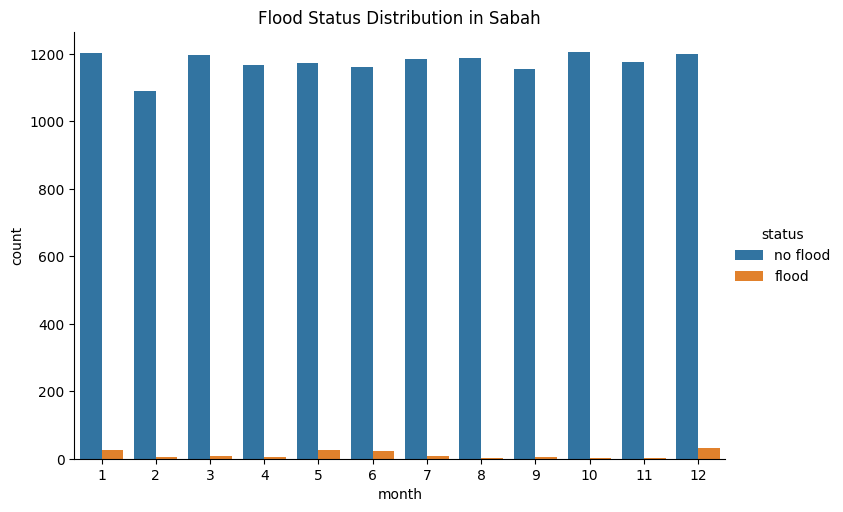

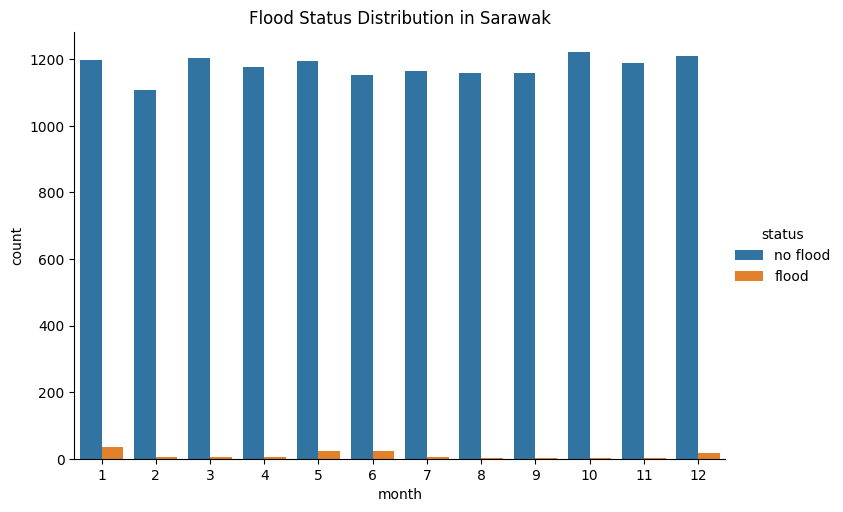

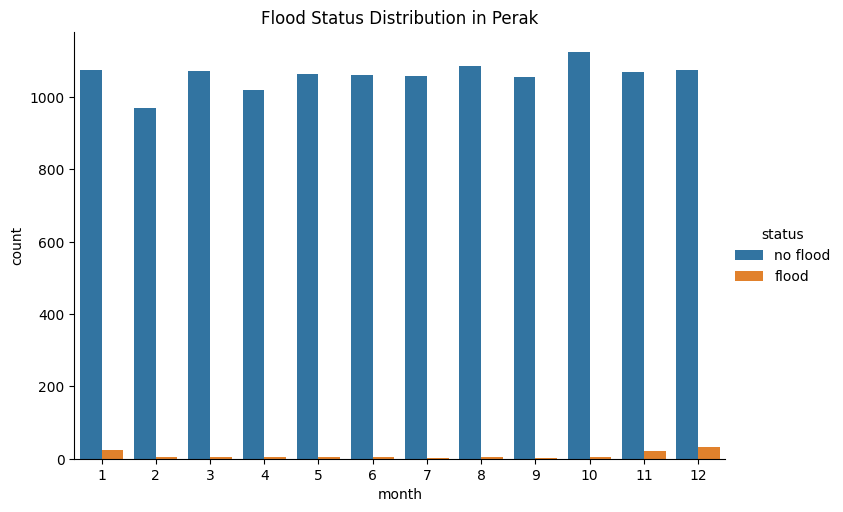

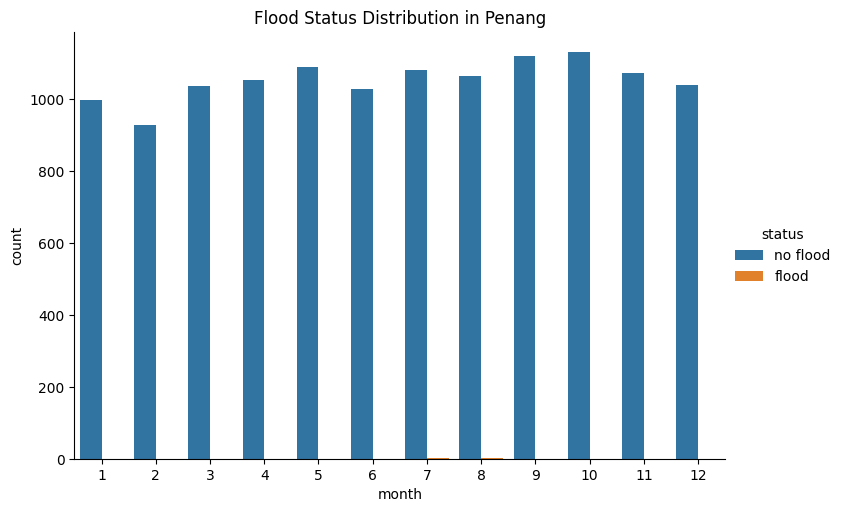

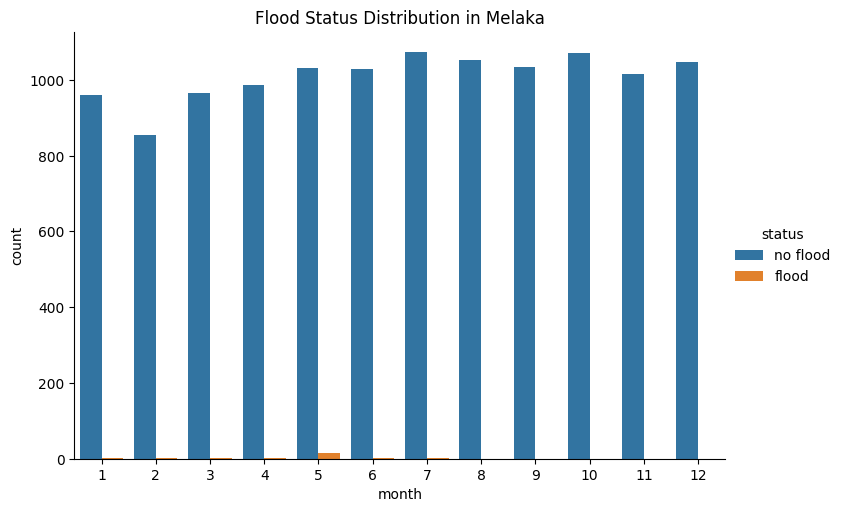

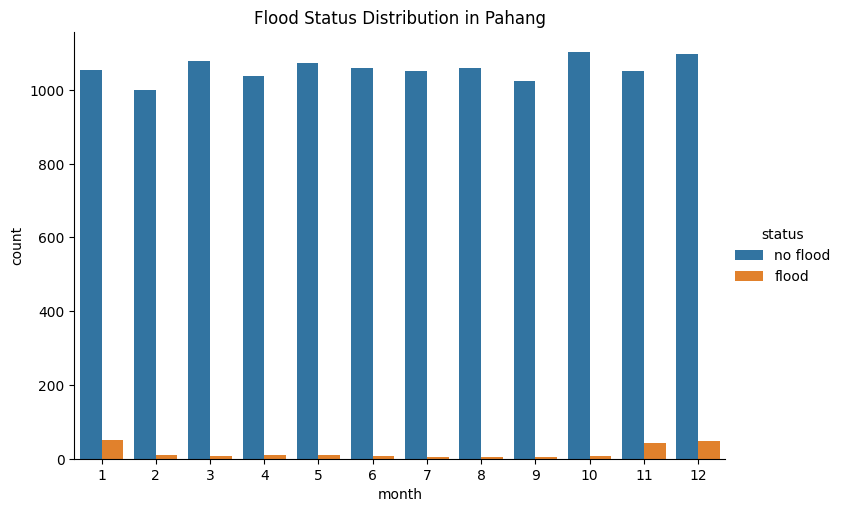

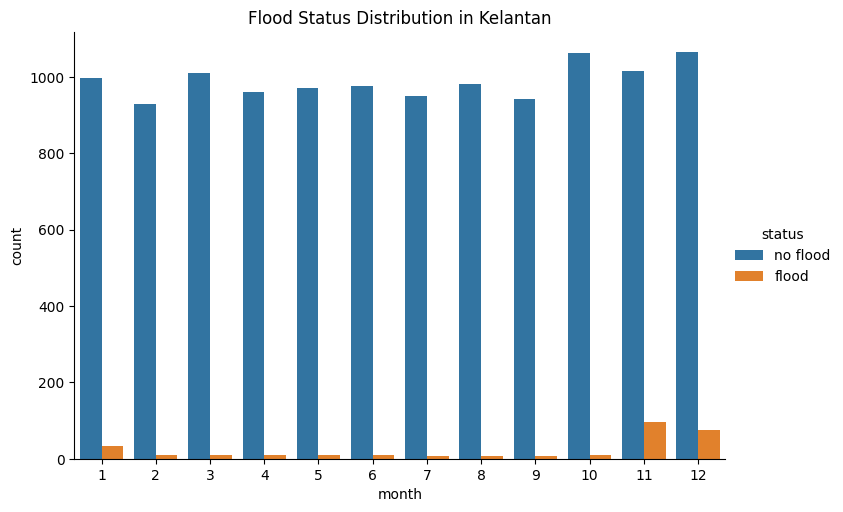

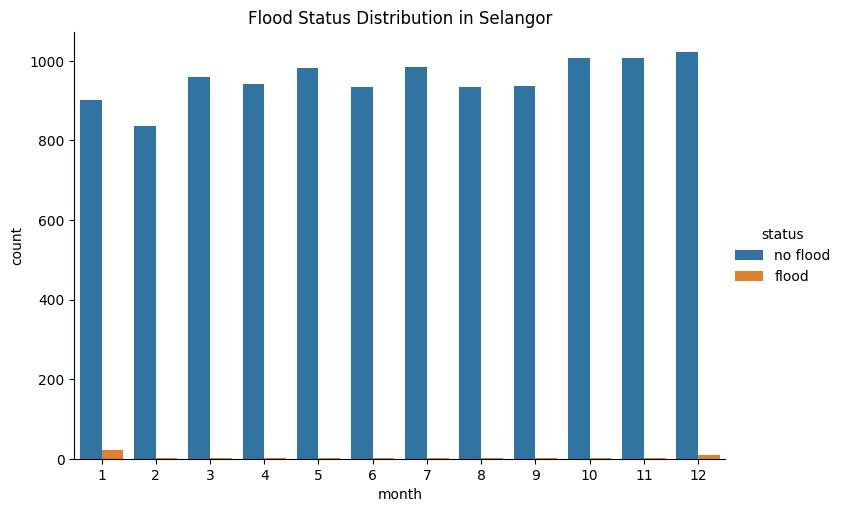

In [73]:
selected_states = ['Sabah', 'Sarawak', 'Perak', 'Penang', 'Melaka', 'Pahang', 'Kelantan', 'Selangor']
df['month'] = df['DATE'].dt.month
monthly_data_status = filtered_data.groupby([filtered_data['DATE'].dt.month, filtered_data['state']])['status'].value_counts()
df['state_codes'] = pd.factorize(df['state'])[0]

for i in df['state_codes'].unique():
    subset = df[df['state_codes'] == i]
    state_name = selected_states[i]  # Get the state name from selected_states list
    g = sns.catplot(x='month', hue='status', data=subset, kind='count', aspect=1.5)
    g.set(title=f'Flood Status Distribution in {state_name}')

plt.show()


# **Syafiq prediction model test - Naive Bayes**
- predict based on precipitation and temperature average we predict which areas would flood in the future

In [74]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import numpy as np

df['month'] = df['DATE'].dt.month

accuracy_scores = []
mislabeled_points = []

# Iterate over each selected state
for state in selected_states:
    # Filter data for the current state
    state_data = df[df['state'] == state]

    X = state_data[['PRCP', 'TAVG']].values
    y = state_data['status'].values

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

    # Train Gaussian Naive Bayes classifier
    gnb = GaussianNB()
    y_pred = gnb.fit(X_train, y_train).predict(X_test)

    # Calculate mislabeled points
    mislabeled = np.sum(y_test != y_pred)
    mislabeled_points.append(mislabeled)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

    print(f"For state {state}, Accuracy: {accuracy}, Mislabeled points: {mislabeled}")
    print('Precision= {:.2f}'.format(precision_score(y_test, y_pred, average='macro')))
    print('Recall= {:.2f}'.format(recall_score(y_test, y_pred, average='macro')))
    print('F1= {:.2f}'.format(f1_score(y_test, y_pred, average='macro')))
    print('Accuracy= {:.2f}'.format(accuracy_score(y_test, y_pred)))
    print(' ')

overall_accuracy = np.mean(accuracy_scores)
print(f"Overall Accuracy: {overall_accuracy}")

total_mislabeled = np.sum(mislabeled_points)
print(f"Total Mislabeled points: {total_mislabeled}")


For state Sabah, Accuracy: 0.9908759124087592, Mislabeled points: 65
Precision= 0.50
Recall= 0.50
F1= 0.50
Accuracy= 0.99
 
For state Sarawak, Accuracy: 0.9900462638441049, Mislabeled points: 71


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision= 0.50
Recall= 0.50
F1= 0.50
Accuracy= 0.99
 
For state Perak, Accuracy: 0.9898785425101214, Mislabeled points: 65
Precision= 0.54
Recall= 0.51
F1= 0.51
Accuracy= 0.99
 
For state Penang, Accuracy: 0.9998416217928413, Mislabeled points: 1
Precision= 0.50
Recall= 0.50


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


F1= 0.50
Accuracy= 1.00
 
For state Melaka, Accuracy: 0.9980240408364894, Mislabeled points: 12
Precision= 0.50
Recall= 0.50
F1= 0.50
Accuracy= 1.00
 
For state Pahang, Accuracy: 0.971937984496124, Mislabeled points: 181
Precision= 0.51
Recall= 0.51
F1= 0.51
Accuracy= 0.97
 
For state Kelantan, Accuracy: 0.9593348699374382, Mislabeled points: 247
Precision= 0.53
Recall= 0.53
F1= 0.53
Accuracy= 0.96
 
For state Selangor, Accuracy: 0.9954759004698104, Mislabeled points: 26
Precision= 0.50
Recall= 0.50
F1= 0.50
Accuracy= 1.00
 
Overall Accuracy: 0.9869268920369612
Total Mislabeled points: 668


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# **Christopher prediction model test - Balance Random Forest**


In [75]:
from imblearn.ensemble import BalancedRandomForestClassifier

model = BalancedRandomForestClassifier()
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/parallel.py:114: UserWarning: `sklearn.utils.para

BalancedRandomForestClassifier()

In [76]:
y_pred = model.predict(X_test)
model.score(X_test,y_test)

0.45676004872107184

In [77]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
confusion_majority=confusion_matrix(y_test, y_pred)

print('Mjority classifier Confusion Matrix\n', confusion_majority)

print('********')
print('Mjority TN= ', confusion_majority[0][0])
print('Mjority FP=', confusion_majority[0][1])
print('Mjority FN= ', confusion_majority[1][0])
print('Mjority TP= ', confusion_majority[1][1])
print('********')

print('Precision= {:.2f}'.format(precision_score(y_test, y_pred,average = 'macro')))
print('Recall= {:.2f}'. format(recall_score(y_test, y_pred,average = 'macro')))
print('F1= {:.2f}'. format(f1_score(y_test, y_pred,average = 'macro')))
print('Accuracy= {:.2f}'. format(accuracy_score(y_test, y_pred)))

Mjority classifier Confusion Matrix
 [[  17    9]
 [3113 2608]]
********
Mjority TN=  17
Mjority FP= 9
Mjority FN=  3113
Mjority TP=  2608
********
Precision= 0.50
Recall= 0.55
F1= 0.32
Accuracy= 0.46


***Nur Irdinas Part***

Decision Tree Classifier

In [78]:
X_train, X_test, y_train, y_test = train_test_split(flood_data, flood_labels, test_size=0.3, random_state=42)

dt_classifier = DecisionTreeClassifier(random_state=42)

#Train and predict the decision tree classifier
dt_classifier.fit(X_train, y_train)
y_pred_dt = dt_classifier.predict(X_test)

accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Accuracy of Decision Tree Classifier without balancing:", accuracy_dt)
print(classification_report(y_test, y_pred_dt))

Accuracy of Decision Tree Classifier without balancing: 0.9877926041362294
              precision    recall  f1-score   support

       flood       0.07      0.02      0.04       289
    no flood       0.99      1.00      0.99     30512

    accuracy                           0.99     30801
   macro avg       0.53      0.51      0.51     30801
weighted avg       0.98      0.99      0.98     30801



Decision Tree with RUS

In [79]:
#DecisionTree Classifier using RUS

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=42)

# Perform random undersampling
X_resampled, y_resampled = rus.fit_resample(flood_data, flood_labels)
print("Class distribution after undersampling:")
print(pd.Series(y_resampled).value_counts())

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train and predict the decision tree classifier
dt_classifier.fit(X_train, y_train)
y_pred_dt = dt_classifier.predict(X_test)

accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Accuracy of Decision Tree Classifier with Random Undersampling:", accuracy_dt)
print(classification_report(y_test, y_pred_dt))

Class distribution after undersampling:
flood       968
no flood    968
dtype: int64
Accuracy of Decision Tree Classifier with Random Undersampling: 0.5783132530120482
              precision    recall  f1-score   support

       flood       0.58      0.56      0.57       289
    no flood       0.58      0.59      0.59       292

    accuracy                           0.58       581
   macro avg       0.58      0.58      0.58       581
weighted avg       0.58      0.58      0.58       581



Decision Tree With SMOTE

In [80]:
#DecisionTree Classifier using SMOTE

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(flood_data, flood_labels)
print("Class distribution after SMOTE:")
print(pd.Series(y_resampled).value_counts())

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train and predict the decision tree classifier
dt_classifier.fit(X_train, y_train)
y_pred_dt = dt_classifier.predict(X_test)

accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Accuracy of Decision Tree Classifier with SMOTE:", accuracy_dt)
print(classification_report(y_test, y_pred_dt))

Class distribution after SMOTE:
no flood    101701
flood       101701
dtype: int64
Accuracy of Decision Tree Classifier with SMOTE: 0.8234214450762852
              precision    recall  f1-score   support

       flood       0.86      0.77      0.81     30561
    no flood       0.79      0.87      0.83     30460

    accuracy                           0.82     61021
   macro avg       0.83      0.82      0.82     61021
weighted avg       0.83      0.82      0.82     61021



Gaussian NB

In [81]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

X_train, X_test, y_train, y_test = train_test_split(flood_data, flood_labels, test_size=0.3, random_state=42)

gnb = GaussianNB()

y_pred_gnb = gnb.fit(X_train, y_train).predict(X_test)

accuracy_gnb = accuracy_score(y_test, y_pred_gnb)
print("Accuracy of Gaussian Naive Bayes without balancing:", accuracy_gnb)
print(classification_report(y_test, y_pred_gnb))


Accuracy of Gaussian Naive Bayes without balancing: 0.978507191324957


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

       flood       0.04      0.05      0.04       289
    no flood       0.99      0.99      0.99     30512

    accuracy                           0.98     30801
   macro avg       0.51      0.52      0.52     30801
weighted avg       0.98      0.98      0.98     30801



Gaussian NB with RUS

In [82]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(flood_data, flood_labels, test_size=0.3, random_state=42)

# Initialize Random Under-Sampler
rus = RandomUnderSampler(random_state=42)

# Perform random under-sampling
X_train_resampled, y_train_resampled = rus.fit_resample(X_train, y_train)

# Initialize Gaussian Naive Bayes classifier
gnb = GaussianNB()

# Fit the classifier with resampled data and make predictions
y_pred_gnb = gnb.fit(X_train_resampled, y_train_resampled).predict(X_test)

# Calculate accuracy and print the results
accuracy_gnb = accuracy_score(y_test, y_pred_gnb)
print("Accuracy of Gaussian Naive Bayes with RUS:", accuracy_gnb)
print(classification_report(y_test, y_pred_gnb))

Accuracy of Gaussian Naive Bayes with RUS: 0.8751339242232395
              precision    recall  f1-score   support

       flood       0.02      0.26      0.04       289
    no flood       0.99      0.88      0.93     30512

    accuracy                           0.88     30801
   macro avg       0.51      0.57      0.49     30801
weighted avg       0.98      0.88      0.92     30801



Gaussian NB with SMOTE

In [83]:
#Apply SMOTE to balance the class distribution
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

gnb = GaussianNB()
y_pred_gnb = gnb.fit(X_train_resampled, y_train_resampled).predict(X_test)

accuracy_gnb = accuracy_score(y_test, y_pred_gnb)
print("Accuracy of Gaussian Naive Bayes with SMOTE:", accuracy_gnb)
print(classification_report(y_test, y_pred_gnb))

Accuracy of Gaussian Naive Bayes with SMOTE: 0.8571799616895556
              precision    recall  f1-score   support

       flood       0.02      0.30      0.04       289
    no flood       0.99      0.86      0.92     30512

    accuracy                           0.86     30801
   macro avg       0.51      0.58      0.48     30801
weighted avg       0.98      0.86      0.91     30801



Random Classifier

In [84]:
X_train, X_test, y_train, y_test = train_test_split(flood_data, flood_labels, test_size=0.3, random_state=42)

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

rf_classifier.fit(X_train, y_train)

y_pred_rf = rf_classifier.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy of Random Forest Classifier without balancing:", accuracy_rf)
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

<ipython-input-84-6924770dc6e5>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(X_train, y_train)


Accuracy of Random Forest Classifier without balancing: 0.9896107269244505
Classification Report:
              precision    recall  f1-score   support

       flood       0.08      0.01      0.02       289
    no flood       0.99      1.00      0.99     30512

    accuracy                           0.99     30801
   macro avg       0.54      0.50      0.51     30801
weighted avg       0.98      0.99      0.99     30801

Confusion Matrix:
[[    3   286]
 [   34 30478]]


Random Classifier with RUS

In [85]:
rus = RandomUnderSampler(random_state=42)

X_resampled_rf, y_resampled_rf = rus.fit_resample(flood_data, flood_labels)

print("Class distribution after RUS:")
print(pd.Series(y_resampled_rf).value_counts())

X_train, X_test, y_train, y_test = train_test_split(X_resampled_rf, y_resampled_rf, test_size=0.3, random_state=42)

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)


rf_classifier.fit(X_train, y_train)
y_pred_rf = rf_classifier.predict(X_test)


accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy of Random Forest Classifier with RUS:", accuracy_rf)
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

Class distribution after RUS:
flood       968
no flood    968
dtype: int64
Accuracy of Random Forest Classifier with RUS: 0.5817555938037866
Classification Report:
              precision    recall  f1-score   support

       flood       0.58      0.57      0.57       289
    no flood       0.58      0.60      0.59       292

    accuracy                           0.58       581
   macro avg       0.58      0.58      0.58       581
weighted avg       0.58      0.58      0.58       581

Confusion Matrix:
[[164 125]
 [118 174]]


Random Forest Classifier With SMOTE

In [86]:
from sklearn.ensemble import RandomForestClassifier

smote = SMOTE(random_state=42)
X_resampled_rf, y_resampled_rf = smote.fit_resample(flood_data, flood_labels)
print("Class distribution after SMOTE:")
print(pd.Series(y_resampled_rf).value_counts())

X_train, X_test, y_train, y_test = train_test_split(X_resampled_rf, y_resampled_rf, test_size=0.3, random_state=42)
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

rf_classifier.fit(X_train, y_train)
y_pred_rf = rf_classifier.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy of Random Forest Classifier with SMOTE:", accuracy_rf)
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

Class distribution after SMOTE:
no flood    101701
flood       101701
dtype: int64
Accuracy of Random Forest Classifier with SMOTE: 0.8213238065583979
              precision    recall  f1-score   support

       flood       0.86      0.77      0.81     30561
    no flood       0.79      0.87      0.83     30460

    accuracy                           0.82     61021
   macro avg       0.82      0.82      0.82     61021
weighted avg       0.82      0.82      0.82     61021

Confusion Matrix:
[[23565  6996]
 [ 3907 26553]]
